# paper plots, for CC1p events with overlay version 8.11
## differences in overlay release 8.11:
1. large statistics (930k events)

In [1]:
import sys; sys.path.insert(0, '../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
import seaborn as sns;sns.set(style="white", color_codes=True ,font_scale=2);
%matplotlib inline

versions:
{   'OffBeam': 'prod_reco_optfilter_extbnb_v12_mcc8_dev',
    'OnBeam': 'prod_reco_optfilter_bnb_v12_unblind_mcc8',
    'Overlay': 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2',
    'data date': '2018_05_11',
    'date': '2018_05_11',
    'overlay date': '2018_05_11'}
OffBeam_scaling: 0.706302660161 = N(on beam)/N(off beam) before SwT
f(POT): 0.0512441465374 = N(POT on beam)/N(POT MC)


In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/RejectingCosBGInLArTPC/Figures/overlay_v8.11/'

In [3]:
pairtypes  = ['cosmic' ,'CC1p'    ]
labels     = ['Cosmic (data)' ,r'CC1p0$\pi$ (MC)']
colors     = ['red'    ,'blue'         ]
cmaps      = ['Reds'   ,'Blues'        ]
fmts       = ['o'      ,'s']

In [4]:
versions['overlay date'] = '2018_08_16'
versions['Overlay'] = 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2'
OverlaySamples = load_samples(date=versions['overlay date'],filename=versions['Overlay']+'_'+versions['overlay date']+'_vertices')
print "%d"%len(OverlaySamples['cosmic'])+' cosmic pairs and %d'%len(OverlaySamples['1mu-1p'])+' mu-p pairs in overlay'

285009 ccqe candidate pairs, 180070 in FV
74387 are 1mu-1p, 41.3%
55226 are other-pairs, 30.7%
155396 are cosmic, 86.3%
--------------------------------------------------------------
40729 are CC1p, 22.6%
I finished loading overlay samples. We have in total 285009 pairs
155396 cosmic pairs and 74387 mu-p pairs in overlay


In [5]:
cuts_order  = ['no cut'
               ,'Chi2Proton'               
               ,'MatchedFlash'               
               ,'length'
               ,'non-collinearity'               
               ,'vertex activity'               
               ,'delta phi'               
               ,'Pt no delta phi'               
               ,'Pt & delta phi'
              ]


cutlabels = ['preselection'
             ,'$dE/dx$ profile'
             ,'optical filter'
             ,'track lengths'
             ,'collinearity'
             ,'vertex activity'
             ,'coplanarity only'
             ,'$p_t$ imbalance only'
             ,r'$\Delta \phi $ \&  $p_{t}$'
            ]


In [6]:
reducedOverlay,pureffOverlay,pureffNumbers = apply_cuts_to_overlay(OverlaySamples=OverlaySamples
                                                                   ,cuts_order=cuts_order)
pureffOverlay

,$\mu p$ eff.,$\mu p$ pur.,CC$1 p$ eff.,CC$1 p$ pur.,label,1mu-1p,other-pairs,cosmic,CC1p
no cut,100.0%,26.1%,100.0%,14.3%,no cut,100.0% (74387),100.0% (55226),100.0% (155396),100.0% (40729)
Chi2Proton,62.0%,73.0%,66.3%,42.7%,Chi2Proton,62.0% (46155),17.3% (9547),4.8% (7485),66.3% (26989)
MatchedFlash,47.5%,81.1%,51.2%,47.8%,MatchedFlash,47.5% (35339),11.2% (6184),1.3% (2050),51.2% (20836)
length,43.1%,85.4%,46.6%,50.6%,length,43.1% (32061),6.8% (3754),1.1% (1707),46.6% (18980)
non-collinearity,39.7%,89.2%,44.2%,54.4%,non-collinearity,39.7% (29505),5.0% (2760),0.5% (795),44.2% (17993)
vertex activity,29.3%,90.6%,38.6%,65.3%,vertex activity,29.3% (21829),3.3% (1815),0.3% (445),38.6% (15732)
delta phi,20.2%,96.0%,29.9%,77.7%,delta phi,20.2% (15055),0.8% (456),0.1% (179),29.9% (12184)
Pt no delta phi,22.1%,93.3%,31.4%,72.6%,Pt no delta phi,22.1% (16460),1.7% (934),0.2% (245),31.4% (12799)
Pt & delta phi,16.6%,97.1%,25.3%,80.9%,Pt & delta phi,16.6% (12378),0.5% (273),0.1% (101),25.3% (10321)


# numbers

In [7]:
pureffNumbers

,$N_{1mu-1p scaled}$,$N_{1mu-1p}$,$N_{CC1p scaled}$,$N_{CC1p}$,$N_{Overlay scaled}$,$N_{Overlay}$,$N_{cosmic scaled}$,$N_{cosmic}$,$N_{other-pairs scaled}$,$N_{other-pairs}$,${\epsilon}_{1mu-1p}$ [%],${\epsilon}_{CC1p}$ [%],${\epsilon}_{Overlay scaled}$ [%],${\epsilon}_{Overlay}$ [%],${\epsilon}_{cosmic}$ [%],${\epsilon}_{other-pairs}$ [%],${\mathcal{p}}_{1mu-1p}$ [%],${\mathcal{p}}_{CC1p}$ [%]
preselection,74387.0,74387.0,40729.0,40729.0,285009.0,285009.0,155396.0,155396.0,55226.0,55226.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,26.099878,14.290426
Chi2Proton,46155.0,46155.0,26989.0,26989.0,63187.0,63187.0,7485.0,7485.0,9547.0,9547.0,62.047132,66.264824,22.170177,22.170177,4.816726,17.287147,73.045088,42.712900
MatchedFlash,35339.0,35339.0,20836.0,20836.0,43573.0,43573.0,2050.0,2050.0,6184.0,6184.0,47.506957,51.157652,15.288289,15.288289,1.319210,11.197624,81.102977,47.818603
length,32061.0,32061.0,18980.0,18980.0,37522.0,37522.0,1707.0,1707.0,3754.0,3754.0,43.100273,46.600702,13.165198,13.165198,1.098484,6.797523,85.445872,50.583658
non-collinearity,29505.0,29505.0,17993.0,17993.0,33060.0,33060.0,795.0,795.0,2760.0,2760.0,39.664189,44.177367,11.599634,11.599634,0.511596,4.997646,89.246824,54.425287
vertex activity,21829.0,21829.0,15732.0,15732.0,24089.0,24089.0,445.0,445.0,1815.0,1815.0,29.345181,38.626040,8.452014,8.452014,0.286365,3.286495,90.618124,65.307817
delta phi,15055.0,15055.0,12184.0,12184.0,15690.0,15690.0,179.0,179.0,456.0,456.0,20.238751,29.914803,5.505089,5.505089,0.115190,0.825698,95.952836,77.654557
Pt no delta phi,16460.0,16460.0,12799.0,12799.0,17639.0,17639.0,245.0,245.0,934.0,934.0,22.127522,31.424783,6.188927,6.188927,0.157662,1.691232,93.315948,72.560803
Pt & delta phi,12378.0,12378.0,10321.0,10321.0,12752.0,12752.0,101.0,101.0,273.0,273.0,16.640004,25.340666,4.474245,4.474245,0.064995,0.494332,97.067127,80.936324


In [8]:
Ncosmic = len(reducedOverlay['no cut']['cosmic'])
print "plug in table tab:ApplicationOfCuts in ApplicationOfCuts.tex"
print 
print "\hline \hline"
i_label = 0
for i,row in pureffNumbers[:].iterrows(): 
    if i_label>= len(cutlabels): break        
    if i == 'vertex activity': print '\hline'
    e_cosmic = float(row[r'${\epsilon}_{cosmic}$ [%]'])
    e_cc1p = float(row[r'${\epsilon}_{CC1p}$ [%]'])

    print "			"+cutlabels[i_label]+"\
         & \CosmicText{%d"%row['$N_{cosmic}$'] + ("($%.1f"%e_cosmic if e_cosmic>1 else "($%.2f"%e_cosmic )+"\%$)}" +"\
         & \MCText{%d"%row[r'$N_{CC1p}$']+"($%.1f"%e_cc1p+"\%$)"+"}\
         & \MCText{$%.1f"%(float(row[r'${\mathcal{p}}_{CC1p}$ [%]']))+"\%$"+"}\
         \\tabularnewline"
    print "\hline"
    i_label+=1
print
print

plug in table tab:ApplicationOfCuts in ApplicationOfCuts.tex

\hline \hline
			preselection         & \CosmicText{155396($100.0\%$)}         & \MCText{40729($100.0\%$)}         & \MCText{$14.3\%$}         \tabularnewline
\hline
			$dE/dx$ profile         & \CosmicText{7485($4.8\%$)}         & \MCText{26989($66.3\%$)}         & \MCText{$42.7\%$}         \tabularnewline
\hline
			optical filter         & \CosmicText{2050($1.3\%$)}         & \MCText{20836($51.2\%$)}         & \MCText{$47.8\%$}         \tabularnewline
\hline
			track lengths         & \CosmicText{1707($1.1\%$)}         & \MCText{18980($46.6\%$)}         & \MCText{$50.6\%$}         \tabularnewline
\hline
			collinearity         & \CosmicText{795($0.51\%$)}         & \MCText{17993($44.2\%$)}         & \MCText{$54.4\%$}         \tabularnewline
\hline
\hline
			vertex activity         & \CosmicText{445($0.29\%$)}         & \MCText{15732($38.6\%$)}         & \MCText{$65.3\%$}         \tabularnewline
\hline
			coplanarity only  

# Figures

In [7]:
#---------------------------------------------------------------------------------------------
# Aug-1, 2017
def plot_feature_pairs(cut_name=None,yscale=1,
                       var=None,x_label='',mul=1,y_label='normalized counts [a.u.]',
                       bins=None,
                       figsize=(12,8),legend_fontsize=25,fontsize=25,
                       do_add_legend=False,legend_loc='upper center'):
    fig,ax = plt.subplots(figsize=figsize)
    max_h=0
    text_colors=[]
    for i,(pair_type,label,cmap,color) in enumerate(zip(pairtypes,labels,cmaps,colors)):
        sample = reducedOverlay[cut_name][pair_type]
        if len(sample) < 10: continue
#         h,bins,_=plt.hist(mul*sample[var],normed=1,bins=bins,histtype='step',linewidth=3,color=color)
        h,bins = np.histogram(mul*sample[var],bins=bins,normed=1)
        h = h*yscale
        mid = 0.5*(bins[1:]+bins[:-1])
        ax.step(mid,h,where='mid',color=color,linewidth=3)
        text_colors.append(color)
        p = plt.plot([0,0],[0,0], label=label,linestyle='-',linewidth=6,color=color)
        if np.max(h)>max_h: max_h=np.max(h)        
    if do_add_legend:
        leg=ax.legend(fontsize=legend_fontsize,loc=legend_loc)
        for text_color,text in zip(text_colors,leg.get_texts()):
            text.set_color(text_color)

    set_axes(ax,x_label=x_label,y_label=y_label,fontsize=fontsize,do_add_grid=True
             ,xlim=(np.min(bins),np.max(bins))
             ,ylim=(0,1.05*max_h)
            )
    ax.xaxis.set_major_locator(LinearLocator(5));ax.yaxis.set_major_locator(LinearLocator(4))
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    plt.tight_layout()
    return ax
#---------------------------------------------------------------------------------------------

In [9]:
#---------------------------------------------------------------------------------------------
# July-11, 2017
def plot_cut_samples (reduced_cut_name=None,
                      cut_name=None,mul=1,
                      cut_var =None,
                      cut_type= 'max',
                      x_label = 'maximal tracks distance [cm]', y_label='% of sample',
                      xcenter=0,figsize=(12,8),fontsize=25,markers_size=30,
                      xmin=0.1, xmax=10 , Nbins=10, do_add_legend=True, legend_loc='bbox',legend_fontsize=25,
                      ax=None,xticks=None,
                      do_add_texts=False,xy_cosmic_text=(0,0),xy_MC_text=(0,0),MC_text=labels[1]):
    if ax is None:
        fig,ax=plt.subplots(figsize=figsize)
    for i,(pair_type,label,cmap,color,fmt) in enumerate(zip(pairtypes,labels,cmaps,colors,fmts)):
        sample = reducedOverlay[reduced_cut_name][pair_type]
        if cut_type=='max' or cut_type=='min':
            x , frac , frac_err = get_fraction_in_cut( data=sample , cut_var=cut_var , mul=mul , cut_type=cut_type , xmin=xmin, xmax=xmax , Nbins=Nbins )
        elif cut_type=='symmetric':
            x , frac , frac_err = get_fraction_in_symmetriccut( data=sample , cut_var=cut_var , mul=mul , xcenter=xcenter
                                                               , delta_x_min=xmin, delta_x_max=xmax , Nbins=Nbins )
        plt.errorbar(x , y=frac, yerr=frac_err , xerr=0, fmt=fmt 
                     , markersize=markers_size , label=label, color=color, capthick=1 , capsize=2)
    leg=None
    if do_add_legend: 
        if 'bbox' not in legend_loc:
            leg=ax.legend(fontsize=legend_fontsize,loc=legend_loc,markerscale=2.)
        else:
            leg=ax.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.,fontsize=legend_fontsize,markerscale=2.)
        for color,text in zip(colors,leg.get_texts()):
            text.set_color(color)
    if do_add_texts:
        ax.text(xy_cosmic_text[0],xy_cosmic_text[1],labels[0],color=colors[0],fontsize=fontsize)
        ax.text(xy_MC_text[0],xy_MC_text[1],MC_text,color=colors[1],fontsize=fontsize)
    ax.set_ylim(0,101)
    ax.set_xlim(xmin,xmax)
    set_axes(ax,x_label=x_label,y_label=y_label,fontsize=fontsize
             ,xticks=xticks
             ,yticks=[25,50,75,100],do_add_grid=True)
    plt.tight_layout()
    return ax,leg
#---------------------------------------------------------------------------------------------

# $\mu-p$ distance

bin_size: 0.333333333333


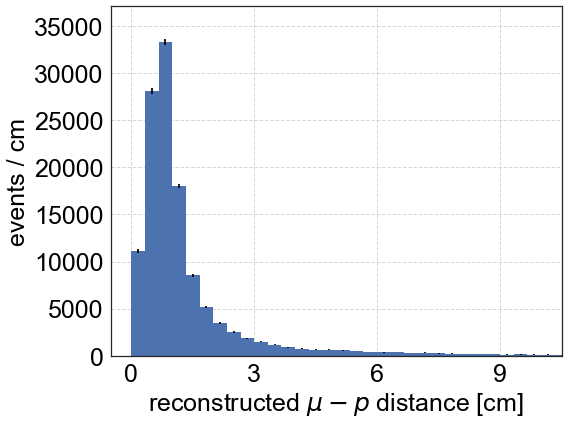

In [18]:
CC1p0pi = reducedOverlay['no cut']['CC1p']
x = CC1p0pi['distance']
fig,ax=plt.subplots(figsize=(8,6))
h,bins = np.histogram(x,bins=np.linspace(0,12,37)); mid = bins[1:] - 0.5*(bins[1]-bins[0])
bin_size = mid[1]-mid[0]
herr = np.sqrt(h)/bin_size
h = h/bin_size
print 'bin_size:',bin_size
ax.bar(mid,h,width=bin_size)
plt.errorbar(x=mid,y=h,yerr=herr,fmt='o',markersize=0, color='red' , ecolor='black', capthick=2)
set_axes(ax,r'reconstructed $\mu-p$ distance [cm]' 
         , 'events / cm', fontsize=25 ,xticks=[0,3,6,9],xlim=(-0.5,10.5))
ax.grid(linestyle='--',alpha=0.75)
plt.plot([11,11],ax.get_ylim(),'--',color='black')
plt.tight_layout()
plt.savefig(figures_path+'mup_distance.pdf')

# detection cuts

# $\chi^2_{p-hypothesis}$

In [9]:
Chi2Proton_muCandidate_min=80
Chi2Proton_muCandidate_max=1000
Chi2Proton_pCandidate_min=0
Chi2Proton_pCandidate_max=30

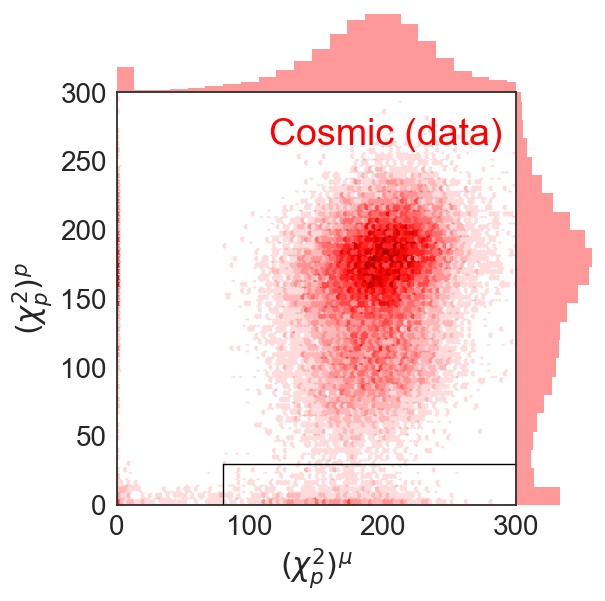

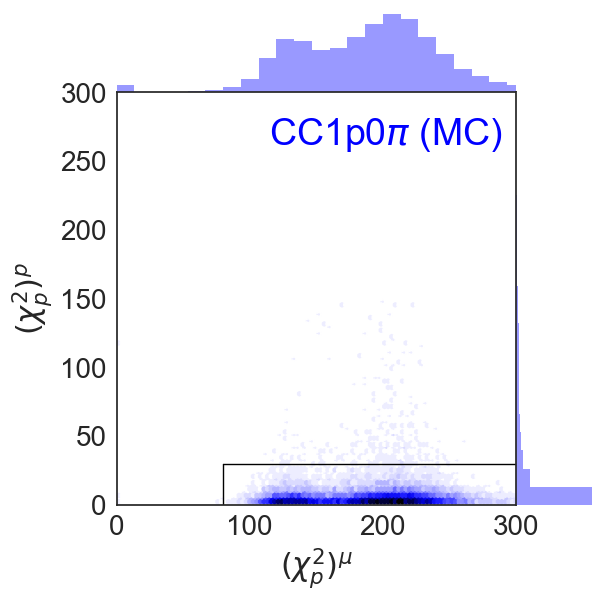

In [12]:
for i,(pair_type,label,cmap,color) in enumerate(zip(pairtypes,labels,cmaps,colors)): 
    sample = reducedOverlay['no cut'][pair_type]
    sample = sample[(sample['pidcali_Chi2ProtonYplane_pCandidate']>-400)
                    &(sample['pidcali_Chi2ProtonYplane_pCandidate']<400)
                    &(sample['pidcali_Chi2ProtonYplane_muCandidate']>-400)
                    &(sample['pidcali_Chi2ProtonYplane_muCandidate']<400)]    
    g = sns.jointplot(sample['pidcali_Chi2ProtonYplane_muCandidate']
                      ,sample['pidcali_Chi2ProtonYplane_pCandidate']
                      ,space=0
                      ,stat_func=None
                      ,kind="hex"                      
                      ,bins=linspace(-1,300,51)
                      ,gridsize=150 
                      ,xlim=(0,300)
                      ,ylim=(0,300)
                      ,color=color                       
                      ,marginal_kws={'color':color,'bins':30})
    g.set_axis_labels(r'$(\chi^2_{p})^{\mu}$',r'$(\chi^2_{p})^{p}$')
    g.ax_joint.plot([Chi2Proton_muCandidate_min,Chi2Proton_muCandidate_min],[Chi2Proton_pCandidate_min,Chi2Proton_pCandidate_max],'-'
                    ,[Chi2Proton_muCandidate_min,Chi2Proton_muCandidate_max],[Chi2Proton_pCandidate_max,Chi2Proton_pCandidate_max],'-'
                    ,color='black',linewidth=1)
    g.fig.text(0.43,0.75,label, color=color, fontsize=27) #add text
    g.savefig(figures_path+'Chi2Proton_mu_p_%d.pdf'%i)

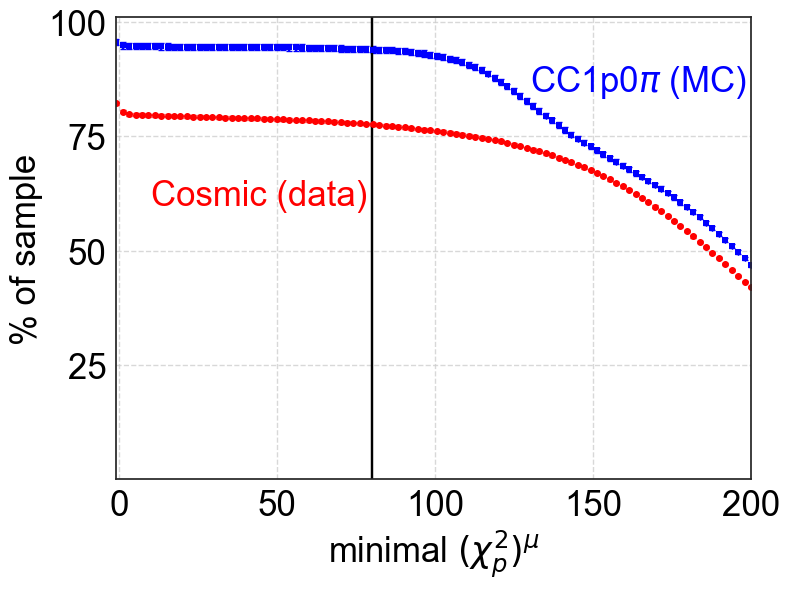

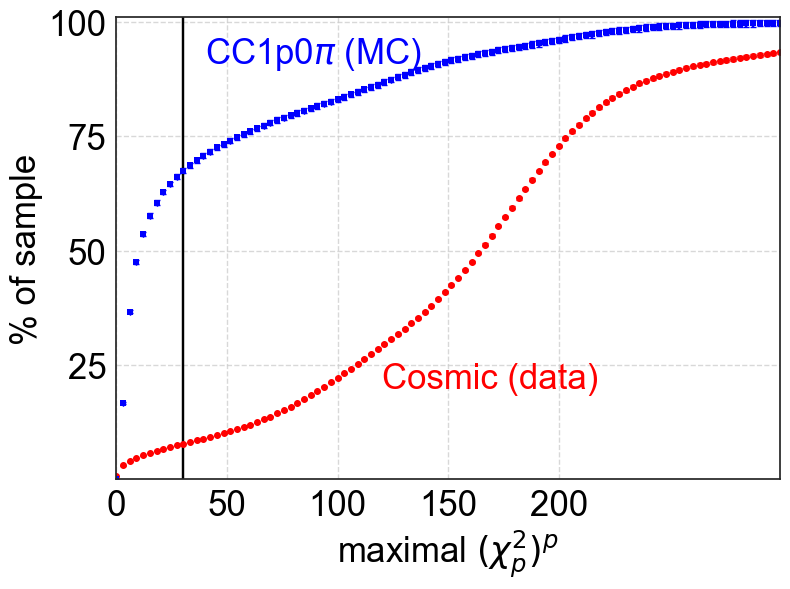

In [12]:
# impact of Chi2Proton cut
Nbins=100
fig=plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)

ax,leg=plot_cut_samples(reduced_cut_name='no cut',markers_size=5,ax=ax
                        ,cut_var ='pidcali_Chi2ProtonYplane_muCandidate'
                        ,cut_type= 'min',fontsize=25
                        ,x_label = r'minimal $(\chi^2_{p})^{\mu}$'
                        ,xmin=-1, xmax=200 , Nbins=Nbins
                        ,do_add_legend=False,legend_loc='upper right'
                        ,do_add_texts=True,xy_cosmic_text=(10,60),xy_MC_text=(130,85)
                        ,xticks=[0,50,100,150,200])
plt.plot([Chi2Proton_muCandidate_min,Chi2Proton_muCandidate_min],ax.get_ylim(),'-',color='black')
plt.tight_layout()
plt.savefig(figures_path+'Chi2Proton_cuts_muCandidate.pdf', bbox_inches='tight')

fig=plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax,leg=plot_cut_samples(reduced_cut_name='no cut',markers_size=5,ax=ax
                        ,cut_var ='pidcali_Chi2ProtonYplane_pCandidate'
                        ,cut_type= 'max',fontsize=25
                        ,x_label = r'maximal $(\chi^2_{p})^{p}$'
                        ,xmin=0, xmax=300 , Nbins=Nbins 
                        ,do_add_legend=False,legend_loc='upper right'
                        ,do_add_texts=True,xy_cosmic_text=(120,20),xy_MC_text=(40,91)
                        ,xticks=[0,50,100,150,200])
plt.plot([Chi2Proton_pCandidate_max,Chi2Proton_pCandidate_max],ax.get_ylim(),'-',color='black')

plt.tight_layout()
plt.savefig(figures_path+'Chi2Proton_cuts_pCandidate.pdf', bbox_inches='tight')

# optical filtering

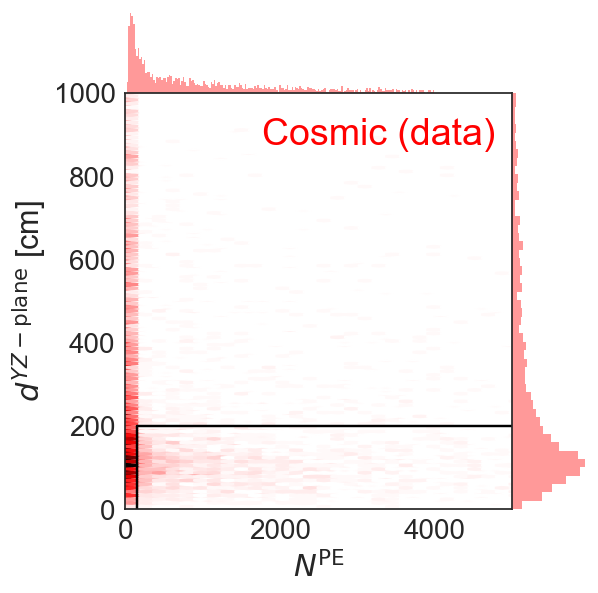

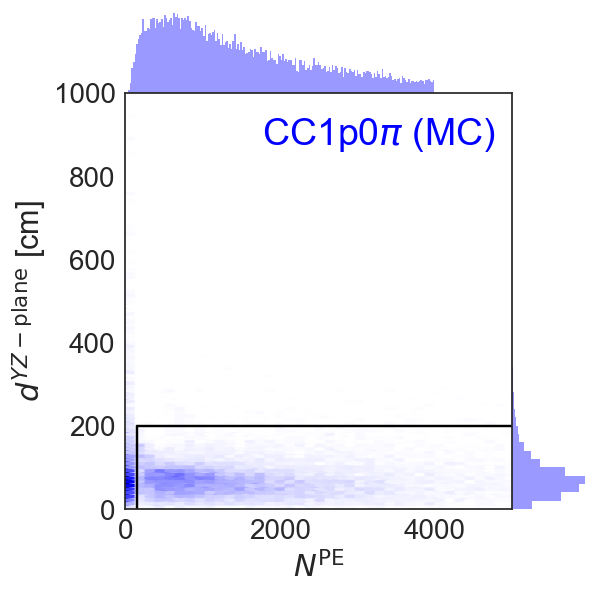

In [14]:
# matched flash total PE
fig = plt.figure(figsize=(28,8))
minPEcut = 150
maxdYZcut = 200

for i,(pair_type,label,cmap,color) in enumerate(zip(pairtypes,labels,cmaps,colors)):
    sample = reducedOverlay['Chi2Proton'][pair_type]
    g = sns.jointplot(sample['MatchedFlash_TotalPE'], sample['ClosestFlash_YZdistance']
                      ,space=0
                      ,stat_func=None
                      ,kind="hex"                      
                      ,gridsize=200
                      ,xlim=(0,5000)
                      ,ylim=(0,1000)
                      ,color=color                       
                      ,marginal_kws={'color':color,'bins':np.linspace(0,4000,200)})
    g.ax_joint.plot([minPEcut,minPEcut],[np.min(g.ax_joint.get_ylim()),maxdYZcut],'-'
                    ,[minPEcut,np.max(g.ax_joint.get_xlim())],[maxdYZcut,maxdYZcut],'-'
                    ,color='black')
    g.fig.text(0.43,0.75,label, color=color, fontsize=27) #add text
    g.set_axis_labels(r'$N^{\mathrm{PE}}$',r'$d^{YZ-\mathrm{plane}}$ [cm]')
    g.savefig(figures_path+'MatchedFlash_after_dEdx_cut_%d.pdf'%i)

# length

pair_type: cosmic
pair_type: CC1p


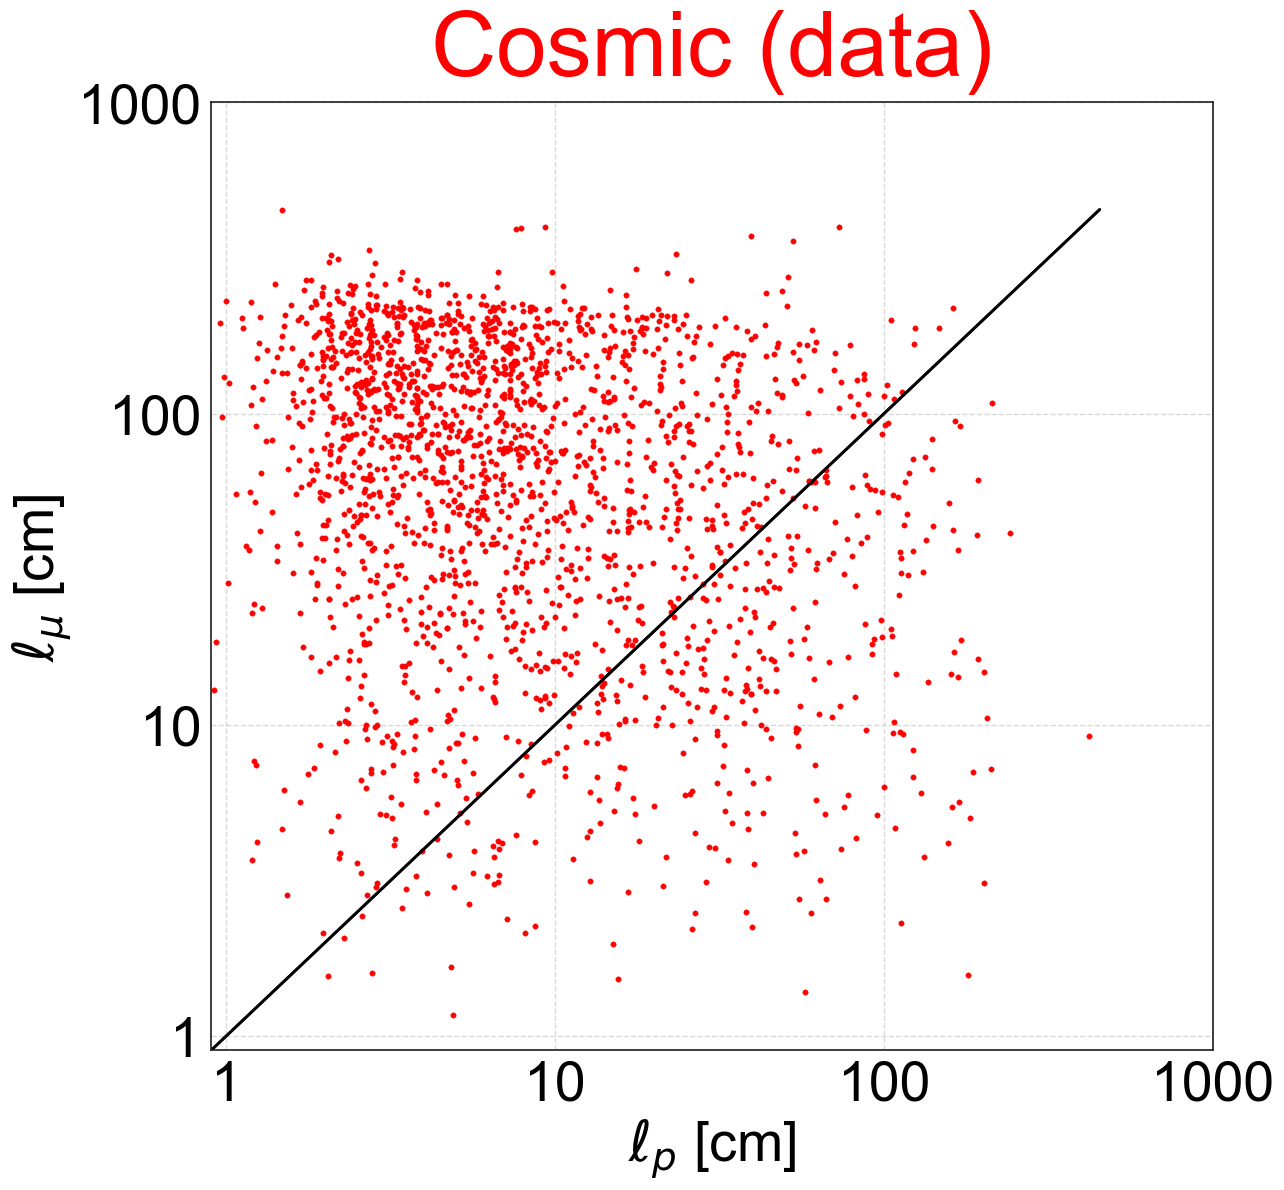

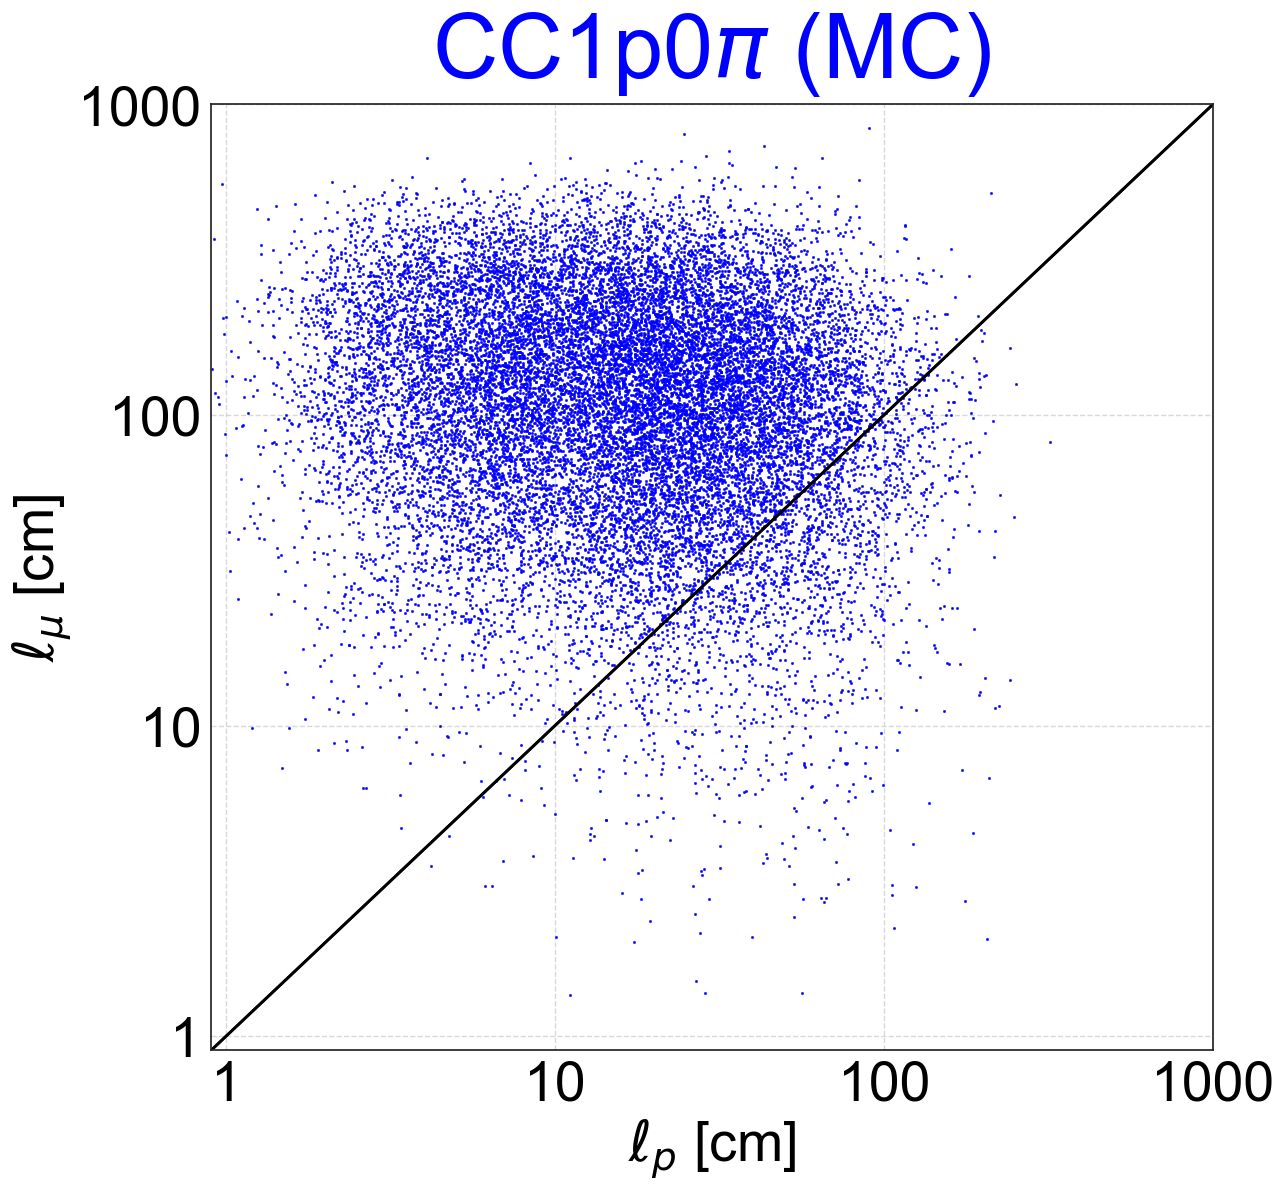

In [12]:
bins=(np.linspace(0,150,50),np.linspace(0,450,50))
x_label,y_label=r'$\ell_{p}$ [cm]',r'$\ell_{\mu}$ [cm]'
for i,(pair_type,label,cmap,color,s) in enumerate(zip(pairtypes,labels,cmaps,colors,[15,3])):
    print 'pair_type:',pair_type
    sample = reducedOverlay['MatchedFlash'][pair_type]
    fig = plt.figure(figsize=(12.944,12))
    ax = fig.add_subplot(1,1,1)
    ax.set_title(label,fontsize=65,y=1.02,color=color)
    ax.scatter(sample['l_pCandidate'], sample['l_muCandidate'],color=color,s=s)
    ax.set_xlim(0.9,450);ax.set_xscale('log')
    ax.set_ylim(0.9,1000);ax.set_yscale('log')
    plt.plot([0,np.max(sample['l_muCandidate'])],[0,np.max(sample['l_muCandidate'])],'-',color='black',linewidth=2)
    plt.plot([0,np.max(sample['l_muCandidate'])],[0,np.max(sample['l_muCandidate'])],'-',color='black',linewidth=2)
    set_axes(ax,x_label=x_label, y_label=y_label,fontsize=40,do_add_grid=True)    
    ax.xaxis.set_ticks([1,10,100,1000])
    ax.yaxis.set_ticks([1,10,100,1000])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    plt.tight_layout()
    fig.savefig(figures_path+'l_mu_p_after_dEdx_and_PMT_cuts_%d.pdf'%i)

# non collinearity

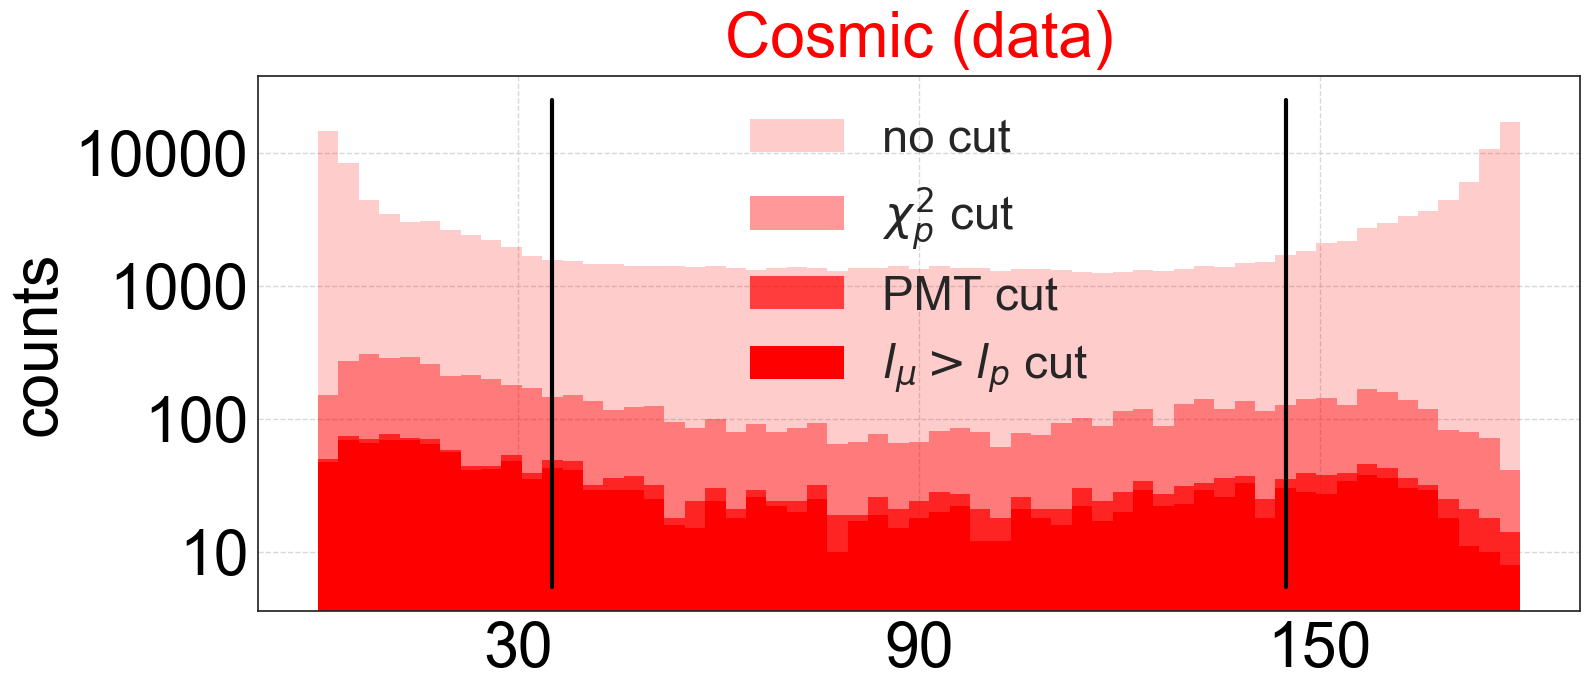

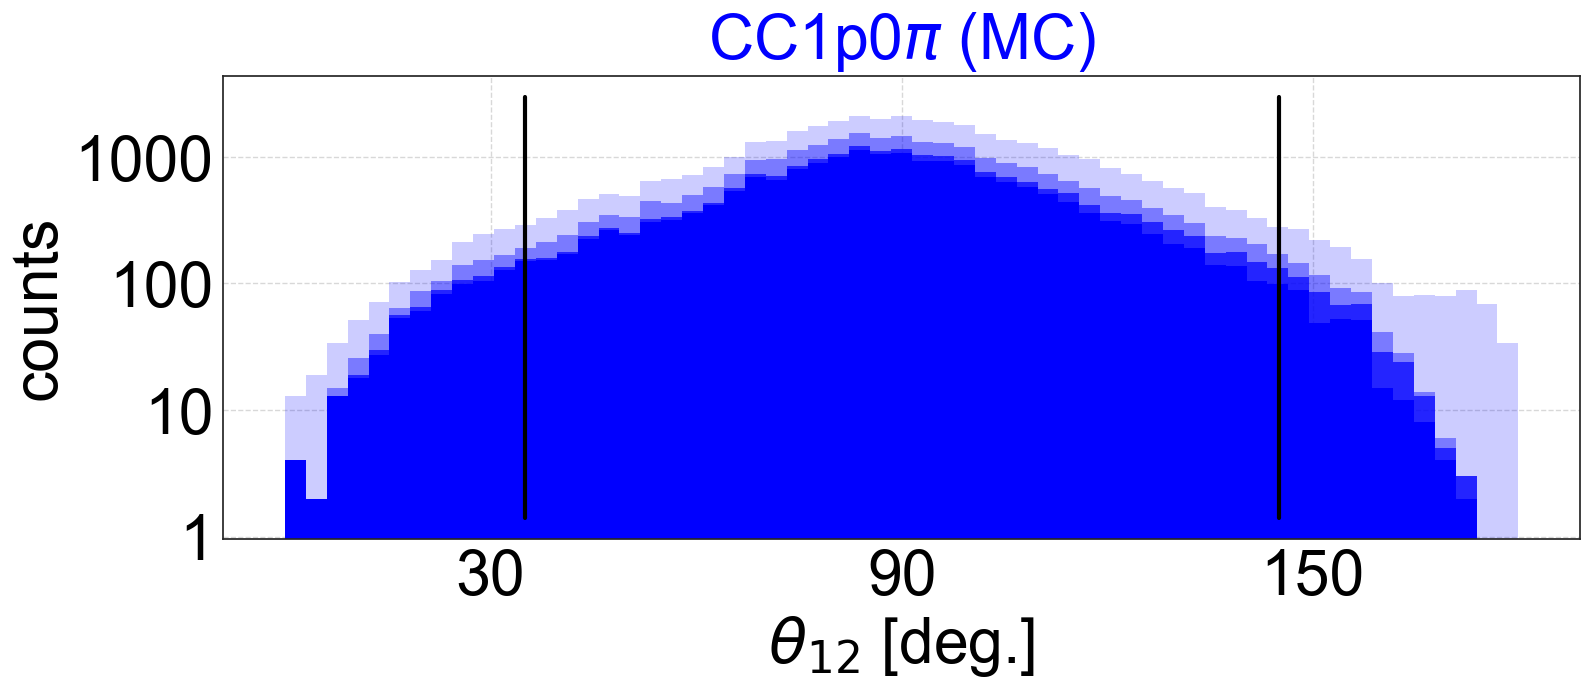

In [15]:
bins=np.linspace(0,180,60)
x_label=r'$\theta_{12}$ [deg.]'
for i,(pair_type,label,cmap,color) in enumerate(zip(pairtypes,labels,cmaps,colors)):
    RGB = (1,0,0) if color=='red' else (0,0,1) if color=='blue' else (0,0,0)
    fig = plt.figure(figsize=(16,7))
    ax = fig.add_subplot(1,1,1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)    
    set_axes(ax,x_label=x_label if i>0 else ''
             , y_label='counts'# if i==0 else ''
             ,fontsize=45
             ,xticks=[30,90,150],yticks=[10,100,1000]
             ,ticks_color='black',do_add_grid=True) 
    # change frame color
    #     for spine in ax.spines.values(): spine.set_edgecolor(color) 
    for cut_name,s_label,alpha in zip(['no cut','Chi2Proton','MatchedFlash','length'] 
                                      ,['no cut','$\chi^2_{p}$ cut',r'PMT cut',r'$l_\mu>l_p$ cut']
                                      ,[0.2,0.4,0.7,1]):
        sample = reducedOverlay[cut_name][pair_type]
        theta = sample['theta_12'] 
        plt.hist(theta,bins=bins,color=color,histtype='stepfilled'
                 ,label=s_label
                 ,linewidth=3, fc=(RGB[0],RGB[1],RGB[2],alpha)) #,normed=1
    ax.set_yscale('log')
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    if i==0:  ax.legend(fontsize=34,loc='upper center')    
    plt.plot([35,35],ax.get_ylim(),'-'
             ,[145,145],ax.get_ylim(),'-'
             ,color='black',linewidth=3)

    plt.subplots_adjust(right=0.5)
    plt.tight_layout()
    fig.savefig(figures_path+'theta_12_before_after_dEdx_PMT_length_cuts_%d.pdf'%i)

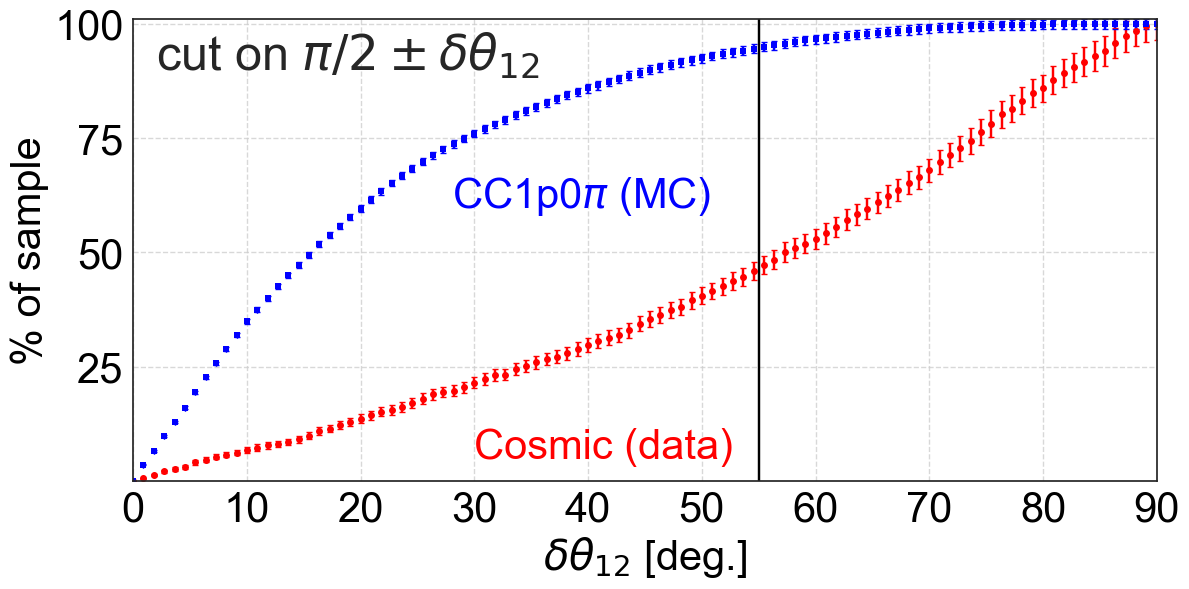

In [22]:
# after cuts on PIDa and tracks-length
ax,leg=plot_cut_samples(reduced_cut_name='length',markers_size=5
                        ,cut_var ='theta_12'
                        ,do_add_legend=False, legend_loc='bbox'
                        ,cut_type= 'symmetric',fontsize=30,figsize=(12,6)
                        ,x_label = r'$\delta \theta_{12}$ [deg.]'
                        ,xcenter=90, xmin=0., xmax=90 , Nbins=100
                        ,do_add_texts=True,xy_cosmic_text=(30,5),xy_MC_text=(28,60))
plt.text(2,90,r'cut on $\pi/2 \pm \delta \theta_{12}$',fontsize=35)
plt.plot([55,55],ax.get_ylim(),'-',color='black')
plt.tight_layout()
plt.savefig(figures_path+'theta_12_cuts_after_dEdx_PMT_length_cuts.pdf',bbox_inches='tight')

# Kinematical cuts

In [21]:
from scipy.optimize import leastsq
from scipy.stats import norm                                                                                                                                                                                                                                                                                                                                                                                                                   
from scipy.optimize import curve_fit

# $\Delta \phi$

$\mu=0.112 \pm 0.108, \sigma=7.075 \pm 0.088$


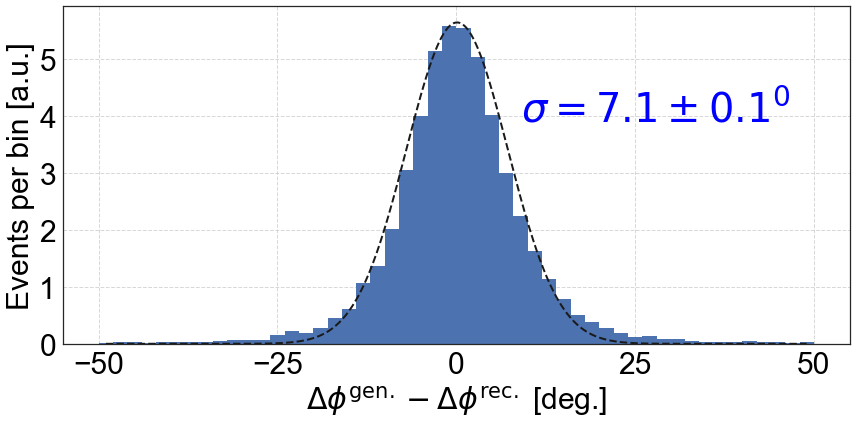

In [77]:
fig,ax=plt.subplots(figsize=(12,6))
pair_type = pairtypes[1]; label = labels[1]; color = colors[1]
sample = reducedOverlay['vertex activity'][pair_type]
set_axes(ax,r'$\Delta \phi^{\mathrm{gen.}}-\Delta \phi^{\mathrm{rec.}}$ [deg.]' , 'Events per bin [a.u.]', fontsize=30,do_add_grid=True
             ,xticks=[-50,-25,0,25,50])

truncated = sample[np.abs(sample['truth_delta_phi'] - sample['delta_phi'])<25]
delta_truncated = (truncated['truth_delta_phi'] - truncated['delta_phi'])
h,bins = np.histogram(sample['truth_delta_phi'] - sample['delta_phi'],bins=np.linspace(-50,50,51),normed=1)
mid = 0.5*(bins[1:]+bins[:-1])    
# h,bins,_=ax.hist(sample['truth_delta_phi'] - sample['delta_phi'],bins=np.linspace(-50,50,51),color=color,normed=1);
h = h*100
ax.bar(mid,h,width=mid[1]-mid[0])
h_truncated,bins = np.histogram( delta_truncated , bins = linspace(-50,50,51),normed=1);
xdata = mid 
ydata = h_truncated
pars, cov = curve_fit(lambda x, mu, sig : norm.pdf(x, loc=mu, scale=sig), xdata, ydata, p0=[0,9])  
mu,sigma = pars
mu_err,sigma_err = np.sqrt(cov[0,0]),np.sqrt(cov[1,1])
x_fit = linspace(np.min(mid),np.max(mid),1000)
ax.plot(x_fit, 100*norm.pdf(x_fit,*pars), 'k--',linewidth = 2, label='fit before')    
print r'$\mu=%.3f \pm %.3f, \sigma=%.3f \pm %.3f$'%(pars[0],np.sqrt(cov[0,0]), pars[1], np.sqrt(cov[1,1 ]))
plt.text(9,0.7*np.max(h),r'$\sigma=%.1f \pm %.1f$'%( pars[1], np.sqrt(cov[1,1 ]))+'$^0$',color=color,fontsize=40)
plt.tight_layout()
fig.savefig(figures_path+'delta_phi_gen_reco_after_RdQ_cut.pdf')

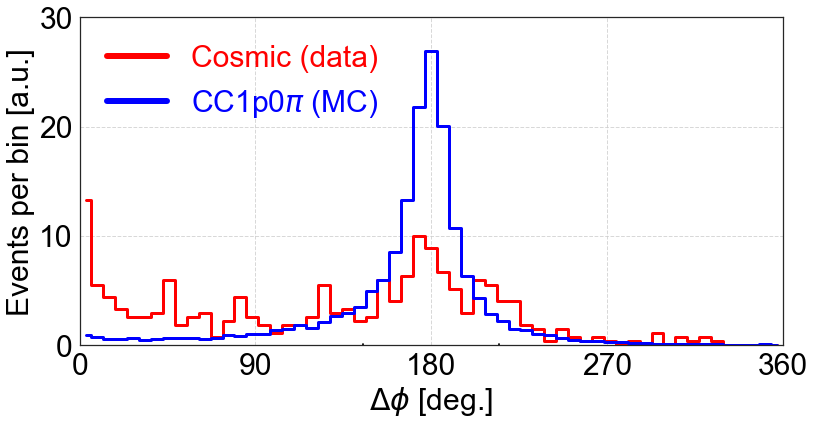

In [78]:
ax=plot_feature_pairs(cut_name='vertex activity',y_label='Events per bin [a.u.]',yscale=1000
                   ,var='delta_phi',x_label=r'$\Delta \phi$ [deg.]',do_add_legend=True,legend_loc='upper left'
                   ,bins=np.linspace(0,360,60),figsize=(12,6),fontsize=30,legend_fontsize=30)
plt.plot([145,145],[0,0.03],'-',[215,215],[0,0.03],'-',color='black')
ax.set_yticks([0,10,20,30])
plt.savefig(figures_path+'DeltaPhi_after_RdQ_cut.pdf')

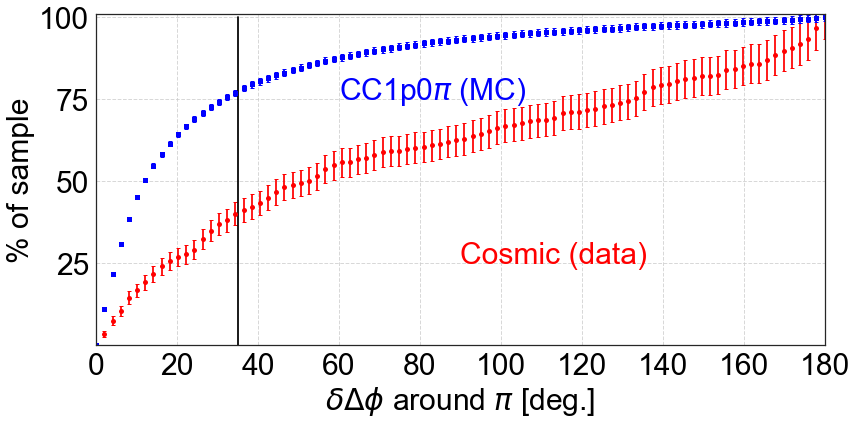

In [21]:
ax,leg=plot_cut_samples(reduced_cut_name='vertex activity'
                        ,do_add_legend=False,markers_size=5
                        ,legend_loc='lower right'
                        ,cut_var ='delta_phi',cut_type= 'symmetric'
                        ,x_label = r'$\delta \Delta \phi$ around $\pi$ [deg.]'
                        ,xcenter=180, xmin=0., xmax=180 , Nbins=90,fontsize=30,figsize=(12,6)
                        ,do_add_texts=True,xy_cosmic_text=(90,25),xy_MC_text=(60,75))
plt.plot([35,35],[0,100],'-',color='black')
plt.savefig(figures_path+'DeltaPhi_cuts_after_RdQ_cut.pdf', bbox_inches='tight')

# $p_t$

$\mu=0.037 \pm 0.005, \sigma=0.172 \pm 0.004$


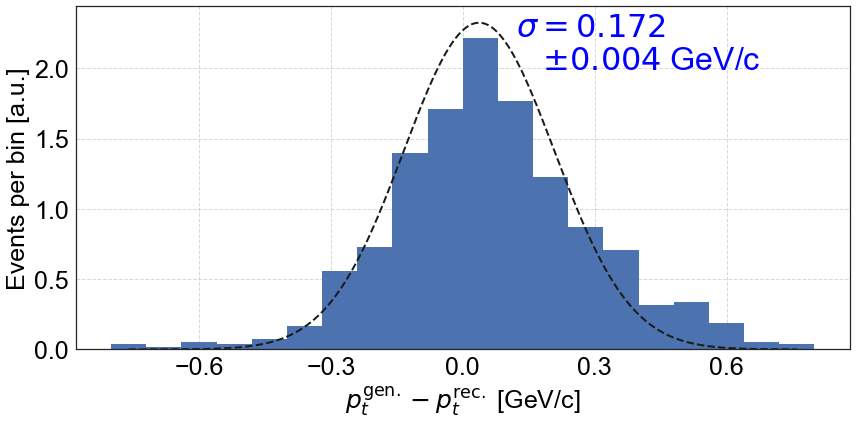

In [75]:
bins=np.linspace(-0.8,0.8,21)
fig,ax=plt.subplots(figsize=(12,6))
pair_type = pair_types[1]; label = labels[1]; color = colors[1]
sample = reducedOverlay['vertex activity'][pair_type]
set_axes(ax,r'$p_{t}^{\mathrm{gen.}}-p_{t}^{\mathrm{rec.}}$ [GeV/c]' ,  'Events per bin [a.u.]', fontsize=25,do_add_grid=True
             ,xticks=[-0.60,-0.3,0,0.3,0.6])

truncated = sample[np.abs(sample['truth_Pt'] - sample['reco_Pt'])<0.35]
delta_truncated = (truncated['truth_Pt'] - truncated['reco_Pt'])
h,bins,_=ax.hist(sample['truth_Pt'] - sample['reco_Pt'],bins=bins,color=color,normed=1);
mid = 0.5*(bins[1:]+bins[:-1])    
# h = h*100
ax.bar(mid,h,width=mid[1]-mid[0])
h_truncated,bins = np.histogram( delta_truncated , bins =bins,normed=1);
mid = 0.5*(bins[1:]+bins[:-1])    
xdata = mid
ydata = h_truncated
pars, cov = curve_fit(lambda x, mu, sig : norm.pdf(x, loc=mu, scale=sig), xdata, ydata, p0=[0,9])  
mu,sigma = pars
mu_err,sigma_err = np.sqrt(cov[0,0]),np.sqrt(cov[1,1])
x_fit = linspace(np.min(mid),np.max(mid),1000)
ax.plot(x_fit, norm.pdf(x_fit,*pars), 'k--',linewidth = 2)    
print r'$\mu=%.3f \pm %.3f, \sigma=%.3f \pm %.3f$'%(pars[0],np.sqrt(cov[0,0]), pars[1], np.sqrt(cov[1,1 ]))
plt.text(0.12,0.9*np.max(h),'$\sigma=%.3f$ \n   $\\pm %.3f$'%( pars[1], np.sqrt(cov[1,1 ]))+' GeV/c',color=color,fontsize=32)
plt.tight_layout()
fig.savefig(figures_path+'Pt_gen_reco_after_RdQ_cut.pdf')

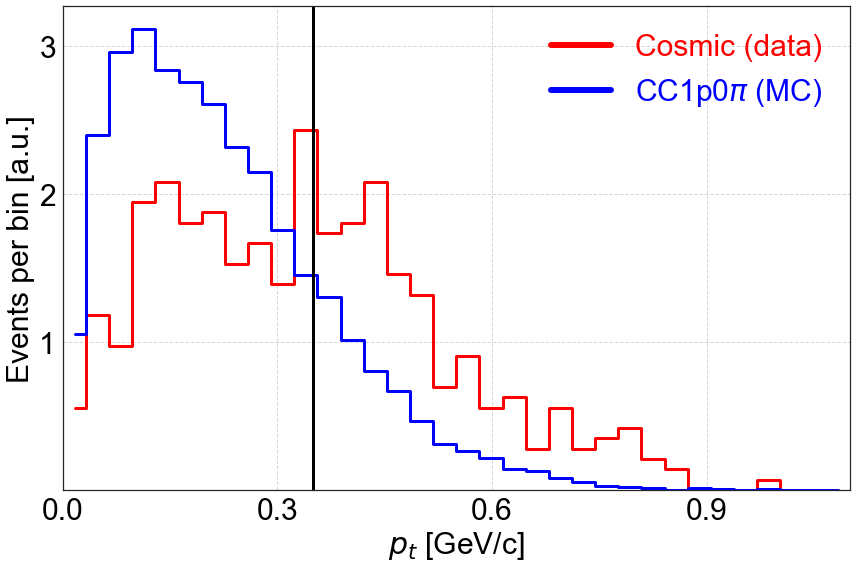

In [76]:
ax=plot_feature_pairs(cut_name='vertex activity',var='reco_Pt',x_label=r'$p_{t}$ [GeV/c]' ,y_label='Events per bin [a.u.]'                             
                      ,bins=np.linspace(0,1.1,35)                              
                      ,do_add_legend=True
                      ,figsize=(12,8),fontsize=30,legend_fontsize=30,legend_loc='upper right')
ax.plot([0.35,0.35],[0,5.5],'-',color='black',linewidth=3)
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.set_xticks([0,0.3,0.6,0.9]);ax.set_yticks([1,2,3])
plt.tight_layout()
plt.savefig(figures_path+'Pt_after_RdQ_cut.pdf')

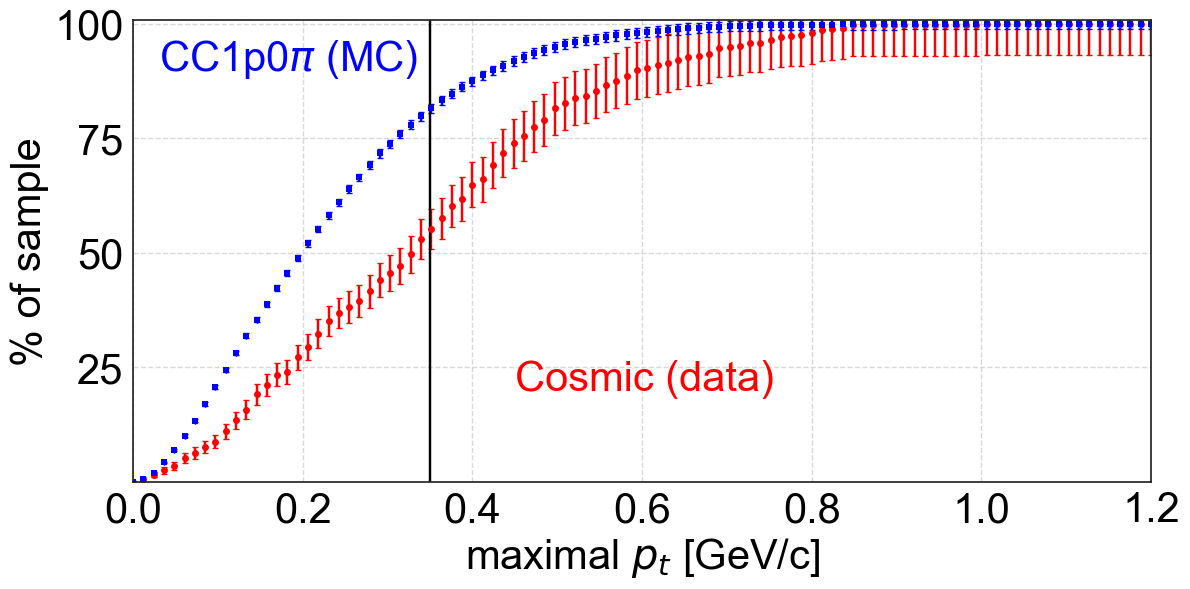

In [13]:
ax,leg=plot_cut_samples(reduced_cut_name='vertex activity',do_add_legend=False,legend_loc='lower right'
                        ,legend_fontsize=25,markers_size=5                
                     ,cut_var ='reco_Pt', cut_type= 'max'
                     ,x_label = 'maximal $p_{t}$ [GeV/c]'
                     ,xmin=0, xmax=1.2 , Nbins=100,fontsize=30,figsize=(12,6)
                        ,do_add_texts=True,xy_cosmic_text=(0.45,20),xy_MC_text=(0.03,90));
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
plt.plot([0.35,0.35],ax.get_ylim(),'-',color='black')
plt.savefig(figures_path+'Pt_cuts_after_RdQ_cut.pdf', bbox_inches='tight')

# arxiv

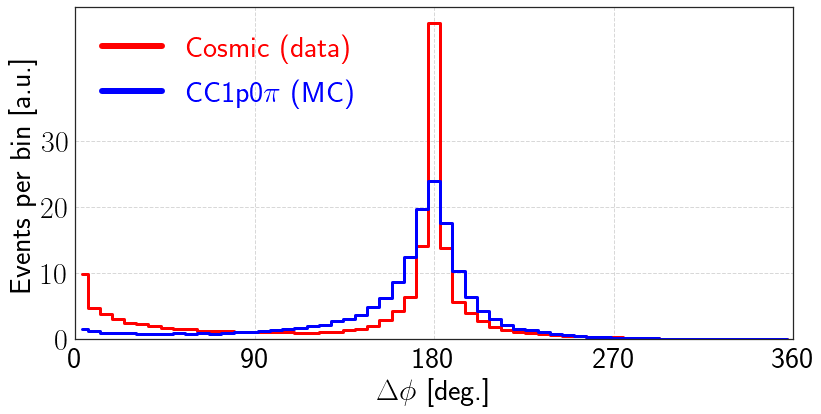

In [16]:
# plt.hist(reducedOverlay['no cut']['cosmic']['delta_phi'],bins=np.linspace(0,360,60));
ax=plot_feature_pairs(cut_name='no cut',y_label='Events per bin [a.u.]',yscale=1000
                   ,var='delta_phi',x_label=r'$\Delta \phi$ [deg.]',do_add_legend=True,legend_loc='upper left'
                   ,bins=np.linspace(0,360,60),figsize=(12,6),fontsize=30,legend_fontsize=30)
ax.set_yticks([0,10,20,30])

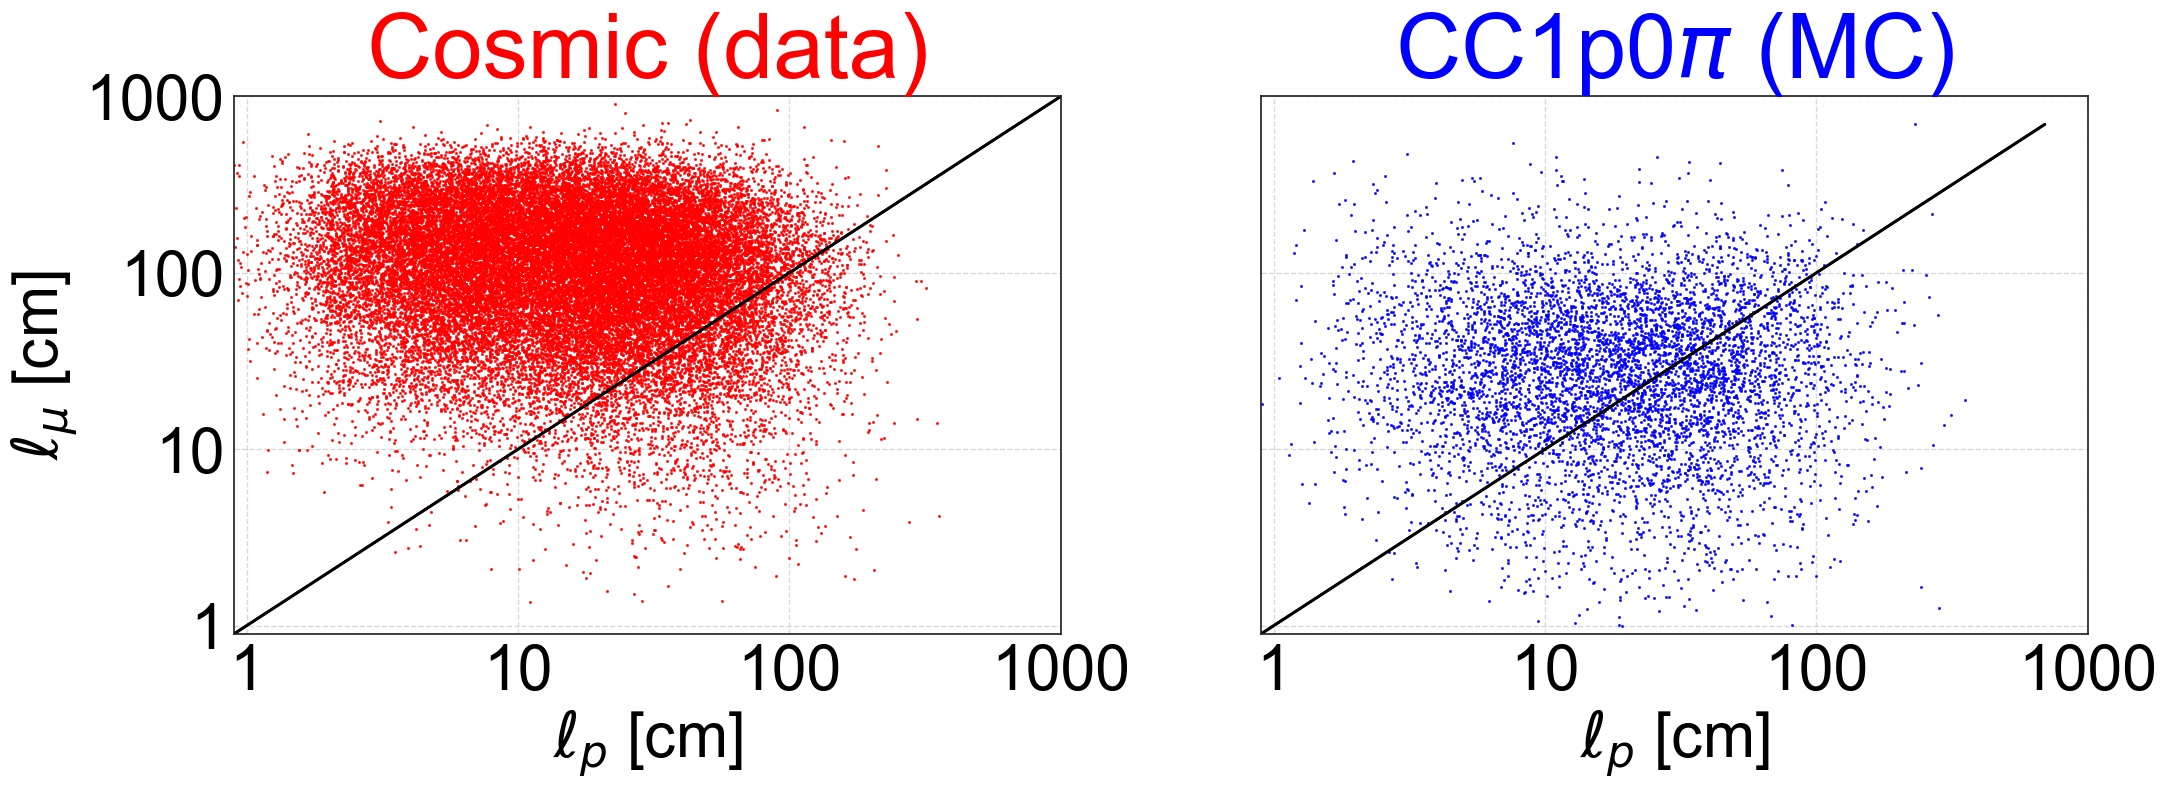

In [15]:
fig = plt.figure(figsize=(22,8))
bins=(np.linspace(0,150,50),np.linspace(0,450,50))
x_label,y_label=r'$\ell_{p}$ [cm]',r'$\ell_{\mu}$ [cm]'
for i,(pair_type,label,cmap,color) in enumerate(zip(pair_types,labels,cmaps,colors)):
    sample = reducedOverlay['MatchedFlash'][pair_type]
    ax = fig.add_subplot(1,2,i+1)
    ax.set_title(label,fontsize=65,y=1.02,color=color)
    ax.scatter(sample['l_pCandidate'], sample['l_muCandidate'],color=color,s=3)
    ax.set_xlim(0.9,450);ax.set_xscale('log')
    ax.set_ylim(0.9,1000);ax.set_yscale('log')
    plt.plot([0,np.max(sample['l_muCandidate'])],[0,np.max(sample['l_muCandidate'])],'-',color='black',linewidth=2)
    plt.plot([0,np.max(sample['l_muCandidate'])],[0,np.max(sample['l_muCandidate'])],'-',color='black',linewidth=2)
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',fontsize=45,do_add_grid=True)    
    ax.xaxis.set_ticks([1,10,100,1000])
    ax.yaxis.set_ticks([1,10,100,1000])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    if i>0: ax.yaxis.set_major_formatter(ticker.NullFormatter())    
plt.subplots_adjust(right=0.5)
plt.tight_layout()
# fig.savefig(figures_path+'l_mu_p_after_dEdx_and_PMT_cuts.pdf')

/usr/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:4384: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if bins == 'log':
/usr/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:4384: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if bins == 'log':


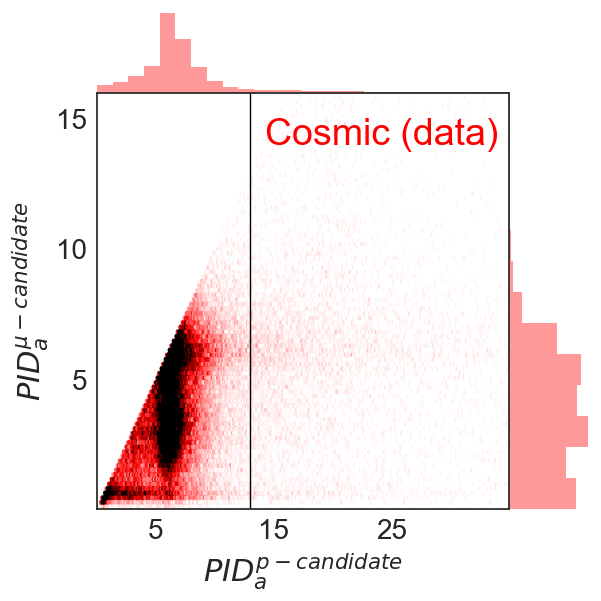

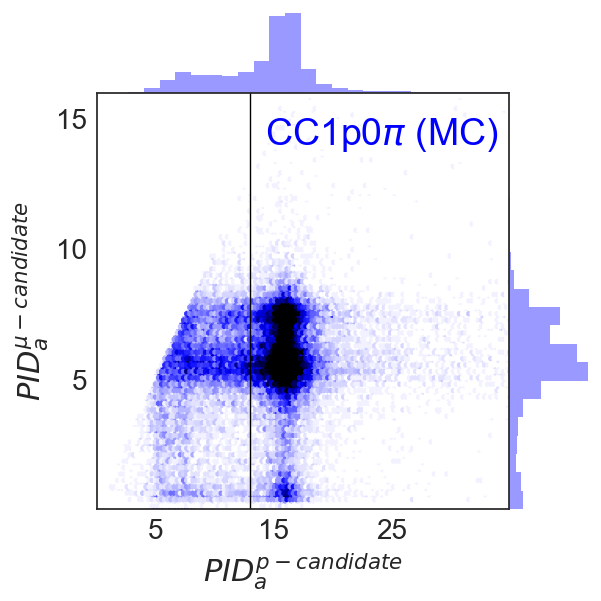

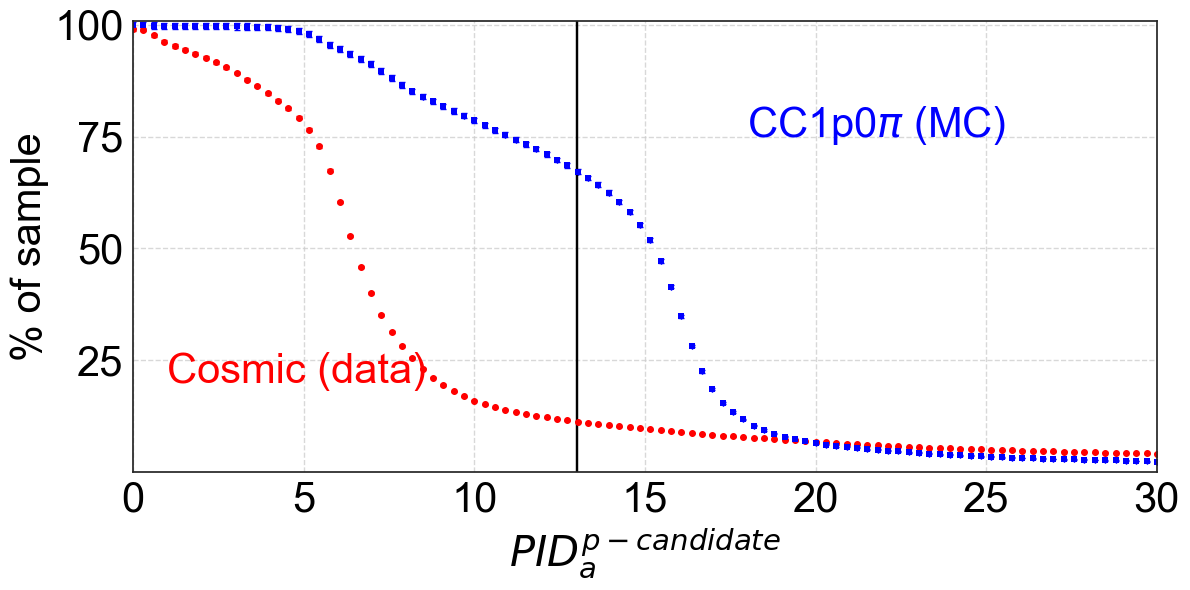

In [11]:
PIDaCut = 13
for i,(pair_type,label,cmap,color) in enumerate(zip(pairtypes,labels,cmaps,colors)): 
    sample = reducedOverlay['no cut'][pair_type]
    sample = sample[(sample['pidcali_PIDaYplane_pCandidate']>-40)&(sample['pidcali_PIDaYplane_pCandidate']<40)
                    &(sample['pidcali_PIDaYplane_muCandidate']>-40) &(sample['pidcali_PIDaYplane_muCandidate']<40)]    
#     plt.hist(sample['pidcali_PIDaYplane_pCandidate'],bins=np.linspace(0,35,35))
    g = sns.jointplot(sample['pidcali_PIDaYplane_pCandidate'], sample['pidcali_PIDaYplane_muCandidate']
                      ,space=0
                      ,stat_func=None
                      ,kind="hex"                      
                      ,bins=np.linspace(0,35,35)
                      ,gridsize=350 if i==0 else 150
                      ,xlim=(0,35)
                      ,ylim=(0,16)
                      ,color=color                       
                      ,marginal_kws={'color':color,'bins':30}
                     )
    g.set_axis_labels(r'$PID_{a}^{p-candidate}$',r'$PID_{a}^{\mu-candidate}$')
    g.ax_joint.set_xticks([5,15,25]); g.ax_joint.set_yticks([5,10,15])
    g.ax_joint.plot([PIDaCut,PIDaCut],g.ax_joint.get_ylim(),'-',color='black',linewidth=1)
    g.fig.text(0.43,0.75,label, color=color, fontsize=27) #add text
# impact of PIDa cut
ax,leg=plot_cut_samples(reduced_cut_name='no cut',markers_size=5,figsize=(12,6)
                        ,cut_var ='pidcali_PIDaYplane_pCandidate'
                        ,cut_type= 'min',fontsize=30
                        ,x_label = r'$PID_{a}^{p-candidate}$'
                        ,xmin=0, xmax=30 , Nbins=100
                        ,do_add_legend=False,legend_loc='upper right'
                        ,do_add_texts=True,xy_cosmic_text=(1,20),xy_MC_text=(18,75))
plt.plot([PIDaCut,PIDaCut],ax.get_ylim(),'-',color='black')